In [33]:
import pandas as pd

In [120]:
df = pd.read_csv('https://stepik.org/media/attachments/lesson/359240/taxi_peru.csv', sep = ';')

In [72]:
df.head()

journey_id                           user_id  \
0  23a1406fc6a11d866e3c82f22eed4d4c  0e9af5bbf1edfe591b54ecdfd7e91e26   
1  dd2af4715d0dc16eded53afc0e243577  a553c46e3a22fb9c326aeb3d72b3334e   
2  dd91e131888064bf7df3ce08f3d4b4ad  a553c46e3a22fb9c326aeb3d72b3334e   
3  dd2af4715d0dc16eded53afc0e2466d0  a553c46e3a22fb9c326aeb3d72b3334e   
4  85b7eabcf5d84e42dc7629b7d27781af  56772d544fdfa589a020a1ff894a86f7   

                          driver_id                           taxi_id  \
0  583949a89a9ee17d19e3ca4f137b6b4c  b12f4f09c783e29fe0d0ea624530db56   
1                               NaN                               NaN   
2                               NaN                               NaN   
3                               NaN                               NaN   
4  d665fb9f75ef5d9cd0fd89479380ba78  0accdd3aa5a322f4129fa20b53278c69   

        icon start_type             start_at     start_lat     start_lon  \
0  executive       asap  2010-11-16 16:44:00  -12,13983536  -77,02355957   
1  executive       asap  2010-06-01 00:34:00  -12,13874817  -76,99536133   
2  executive       asap  2010-05-31 05:01:00  -12,12453079  -77,02780151   
3  executive       asap  2010-06-01 00:29:00  -12,13885117  -76,99530029   
4  executive   reserved  2010-09-11 23:55:00  -12,08995438  -76,92626953   

                end_at       end_lat       end_lon  end_state  \
0  2010-11-16 17:29:00  -12,05537033   -77,0413208   drop off   
1  2010-06-01 00:37:00  -12,12465668  -77,02886963  not found   
2  2010-05-31 05:04:00  -12,13883209  -76,99530029  not found   
3  2010-06-01 00:32:00  -12,12458801  -77,02896118  not found   
4  2010-09-12 01:07:00  -12,02223206  -77,10638428   drop off   

  driver_start_lat driver_start_lon           arrived_at  source  \
0     -12,10825481      -77,0272739  2010-11-16 17:02:00  iPhone   
1              NaN              NaN                  NaN  iPhone   
2              NaN              NaN                  NaN  iPhone   
3              NaN              NaN                  NaN  iPhone   
4     -12,08311558      -76,9277072  2010-09-11 23:50:00  iPhone   

   driver_score  rider_score   tttt  
0           5.0          5.0  23111  
1           NaN          NaN  23111  
2           NaN          NaN  23111  
3           NaN          NaN  23111  
4           4.0          5.0  23111

In [50]:
a = df.groupby('source', as_index = False).agg({'icon' : 'count'})

In [54]:
a

source  icon
0  Android  4909
1      Wap   136
2     iPad   571
3   iPhone  9741
4      web  7631

In [52]:
b= a.icon.sum()

In [53]:
b

22988

In [62]:
a['rtrt'] = a.icon/b*100

In [63]:
a

source  icon       rtrt
0  Android  4909  21.354620
1      Wap   136   0.591613
2     iPad   571   2.483905
3   iPhone  9741  42.374282
4      web  7631  33.195580

In [67]:
a.sort_values('rtrt', ascending = False).head(1)['rtrt'].round()

3    42.0
Name: rtrt, dtype: float64

In [99]:
v = (df.driver_score.value_counts(normalize= True).mul(100)).round(2).reset_index()

In [100]:
v

index  driver_score
0    5.0         58.81
1    4.0         21.88
2    0.0         14.30
3    3.0          2.97
4    1.0          1.23
5    2.0          0.81

In [101]:
driver_score_counts = v.rename(columns = {'index' : 'driver_score', 'driver_score' : 'percentage'}).sort_values('driver_score')

In [102]:
driver_score_counts

driver_score  percentage
2           0.0       14.30
4           1.0        1.23
5           2.0        0.81
3           3.0        2.97
1           4.0       21.88
0           5.0       58.81

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

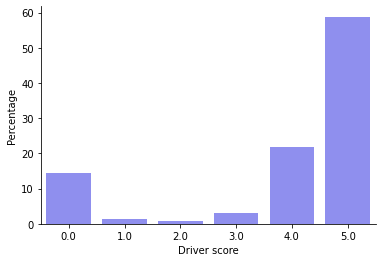

In [104]:
ax = sns.barplot(x='driver_score', y='percentage', data=driver_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='Driver score', ylabel='Percentage')
sns.despine()  # убрать часть рамки графика
plt.show()

In [121]:
b = (df.rider_score .value_counts(normalize= True).mul(100)).round(2).reset_index()

In [123]:
rider_score_counts = b.rename(columns = {'index' : 'rider_score', 'rider_score' : 'percentage'}).sort_values('rider_score')

In [124]:
rider_score_counts

rider_score  percentage
2          0.0        2.29
4          1.0        0.21
5          2.0        0.19
3          3.0        1.38
1          4.0        8.83
0          5.0       87.10

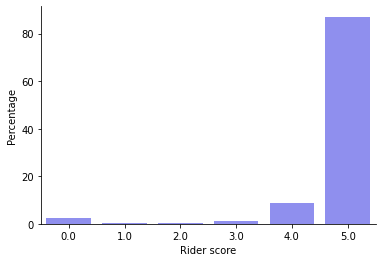

In [125]:
nx = sns.barplot(x='rider_score', y='percentage', data=rider_score_counts, color='blue', alpha=0.5)
nx.set(xlabel='Rider score', ylabel='Percentage')
sns.despine()  # убрать часть рамки графика
plt.show()